# 매출액 예측

## Load Data

In [1]:
from Package.loadfile import load

perform_df, rating_df, test_df = load()

## LSTM Forecasting (2020년 6월 한달 일별 매출액 예측)

In [2]:
# keras 설치
# pip install keras

In [3]:
perform_df['날짜'] = list(map(lambda i : i.date(), perform_df['방송일시']))

In [4]:
df = perform_df.groupby('날짜').sum()[' 취급액 '].reset_index()

In [43]:
# LSTM 데이터로 정제

import numpy as np
# 타임스텝
ts = 7

df[" 취급액 "] = df[' 취급액 '].map(lambda x : (x - df[' 취급액 '].mean()) / np.std(df[' 취급액 ']))
X_train = np.asarray([np.array([df[' 취급액 '].values[i+j] for j in range(ts)])
                      for i in range(len(df[' 취급액 ']) - ts)]).reshape(-1,ts,1)[:-1]
y_train = df[' 취급액 '].values[ts:-1]
X_train.shape, y_train.shape

((358, 7, 1), (358,))

In [44]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(ts, 1)))
model_LSTM.add(Dense(1, activation="linear"))
model_LSTM.compile(loss='mse', optimizer='adam')

model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [45]:
import matplotlib.pyplot as plt

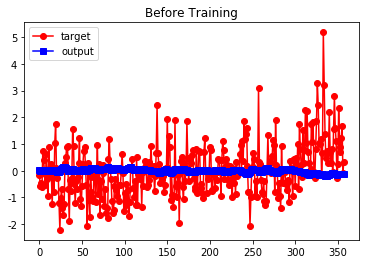

In [46]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("Before Training")
plt.show()

In [47]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000,verbose=0)

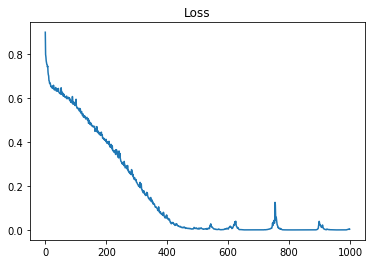

In [48]:
# Loss Graph
plt.plot(history_LSTM.history["loss"])
plt.title("Loss")
plt.show()

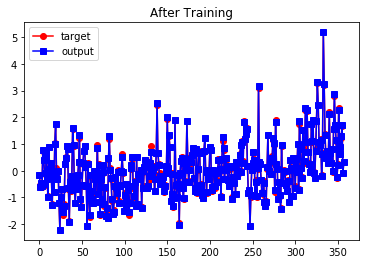

In [49]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("After Training")
plt.show()

In [50]:
df

,날짜,취급액
0,2019-01-01,-3.998148
1,2019-01-02,1.249198
2,2019-01-03,-0.878958
3,2019-01-04,-0.399126
4,2019-01-05,0.268526
...,...,...
361,2019-12-28,1.241230
362,2019-12-29,1.679959
363,2019-12-30,-0.083240
364,2019-12-31,0.332285


In [51]:
len(X_train)

358

In [52]:
y_values

array([[ 0.89878654],
       [ 0.71481353],
       [ 1.2413107 ],
       [ 1.6815538 ],
       [-0.08268443],
       [ 0.3317801 ],
       [-2.744591  ]], dtype=float32)

In [53]:
y_values = model_LSTM.predict(X_train)[-7:]
new_value = model_LSTM.predict(y_values.reshape(-1,ts,1))

In [22]:
import datetime

In [ ]:
# 181 [29]

In [62]:
# 향후 180일 연속 예측
new_datas = []
end_date = datetime.date(2020,6,30)
start_date = datetime.date(2020,1,1)
now_date = start_date
temp = []
for i in range((end_date - start_date).days):
    now_date += datetime.timedelta(days=1)
    if i == 0:
        new_values = np.vstack((y_values,new_value))[-7:]
    else:
        new_values = np.vstack((new_values,new_value))[-7:]
    new_value = model_LSTM.predict(new_values.reshape(-1,ts,1))
    new_datas.append(new_value)

    if now_date >= datetime.date(2020,6,1):
        print(now_date)
        temp.append(new_value[0][0])


2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20
2020-06-21
2020-06-22
2020-06-23
2020-06-24
2020-06-25
2020-06-26
2020-06-27
2020-06-28
2020-06-29
2020-06-30


In [63]:
len(temp)

30

In [66]:
import pandas as pd

In [70]:
perform_df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜
0,2019-01-01 15:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019-01-01
1,2019-01-01 15:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019-01-01
2,2019-01-01 15:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019-01-01
3,2019-01-01 15:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019-01-01
4,2019-01-01 15:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019-01-01
...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 09:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020-01-01
38305,2020-01-01 09:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020-01-01
38306,2020-01-01 10:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020-01-01
38307,2020-01-01 10:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020-01-01


In [72]:
temp_df = pd.DataFrame(temp)
temp_df['매출액'] = temp_df[0].apply(lambda i : i * np.std(perform_df[' 취급액 ']) + perform_df[' 취급액 '].mean())

In [76]:
temp_df[0] = temp_df['매출액'].apply(lambda i : 0 if i < 0 else i)

In [79]:
temp_df.to_json('forecast_lstm.json')

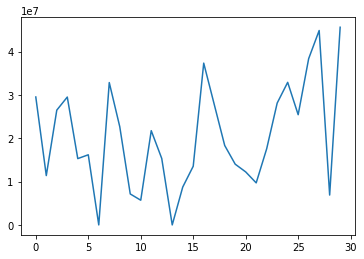

In [78]:
plt.plot(temp_df[0])

In [17]:
import itertools
final = list(itertools.chain(*new_datas))
final = list(itertools.chain(*final))

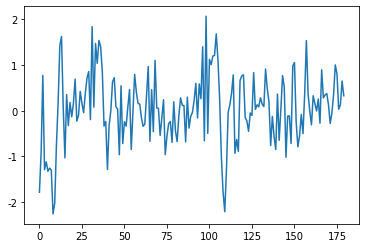

In [18]:
plt.plot(final)

## Feature 뽑아서 Layer 쌓고 Deep Learning 학습 (Feature - 매출액 or 판매량)

### Feature Tuning

In [ ]:
perform_df['시간대'] = list(map(lambda i : i.time().hour, perform_df['방송일시']))

In [ ]:
# 시청률
rating_df.set_index('시간대', inplace=True)

# 이전날짜 24:00에 다음날짜 00시 시청률 추가
rating_df.loc['24:00'] = rating_df.loc['00:00']
rating_df.loc['24:00'][:-1] = rating_df.loc['00:00'][1:]

In [ ]:
# 확인용
rating_df.loc[['00:00', '24:00']]

In [ ]:
perform_df['평균시청률'] = list(map(lambda i : rating_df[str(i['방송일시'])[:10]][str(i['방송일시'])[11:16]:str(i['방송일시'] + timedelta(minutes = int(i['노출(분)'])))[11:16]].mean(), perform_df.iloc))

In [ ]:
perform_df.dropna(inplace=True)

In [ ]:
c_feature = perform_df['상품군'].unique()

for c in c_feature:
    perform_df[c] = 0 

category = list(perform_df['상품군'])

for i,c in enumerate(category):
    perform_df[c][i] = 1

In [ ]:
perform_df.dropna(inplace=True)

In [ ]:
features = ['노출(분)','판매단가','평균시청률','시간대']
features.extend(list(c_feature))

In [ ]:
perform_df[features].isnull().sum()

In [ ]:
perform_df[features]

In [ ]:
import numpy as np
X_datas = np.matrix(perform_df[features])
y_datas = np.array(perform_df[' 취급액 '])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_datas, y_datas, test_size=0.2, shuffle=True)

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
# 딥러닝 모델링

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[15]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
history = model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.2, verbose=0)

In [ ]:
pred = model.predict(X_train)

In [ ]:
# MSE
np.mean((y_train-pred)**2)

In [ ]:
plt.plot(y_train[:200])
plt.plot(pred[:200])
plt.show()

In [ ]:
# 검증 데이터 오차분포 (Scatter)

test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Sell]')
plt.ylabel('Predictions [Sell]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
# 검증 데이터 오차분포 (Bar)

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

## 모델 검증 (Test Data)

In [ ]:
c_feature = test_df['상품군'].unique()

In [ ]:
for c in c_feature:
    test_df[c] = 0 

In [ ]:
features = ['노출(분)','판매단가','평균시청률','시간대']
features.extend(list(c_feature))

In [ ]:
test_df['시간대'] = list(map(lambda i : i.time().hour, test_df'방송일시']))

In [ ]:
# 기상 데이터를 활용해 시청률 예측
# 

In [ ]:
test_df['평균시청률'] = 0

In [ ]:
forecast = np.matrix(test_df[features])

In [ ]:
test_df.drop('취급액', axis=1,inplace=True)

In [ ]:
for_pred = model.predict(forecast)

In [ ]:
test_df['취급액'] = for_pred

In [ ]:
# 무형, 0인 곳 채우기 위함 검증 데이터셋 Raw에 취급액 추가
test_raw['취급액'] = test_df['취급액']

In [ ]:
test_raw.fillna(0).to_csv('datas/result_data/result.csv')

## 참고용

In [ ]:
# 피처 튜닝
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


model = keras.Sequential([
    keras.layers.Layer(input_shape=(X_train.shape)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(X_train, y_train, epochs=5)



test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)